# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 3 - Build a k-Nearest Neighbors Model

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Filter out numeric features of Age, DistanceFromHome, and MonthlyIncome, and scale them. **

In [4]:
from sklearn import preprocessing

In [5]:
scale_feat = ['Age', 'DistanceFromHome', 'MonthlyIncome']
non_scale_feat = ['Churn', 'EnvironmentSatisfaction', 'JobInvolvement', 'StockOptionLevel', 'Sales_Rep', 'Single', 
                  'BusTravLevel', 'Overtime_Dum']
churn_model2_scale_feat = churn_model2[scale_feat]
churn_model2_non_scale_feat = churn_model2[non_scale_feat]
X_scaled = preprocessing.scale(churn_model2_scale_feat)

** Generate dataframe out of scaled numeric features. **

In [6]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = ['Age', 'DistanceFromHome', 'MonthlyIncome']
X_scaled_df.head()

,Age,DistanceFromHome,MonthlyIncome
0,0.446350,-1.010909,-0.108350
1,1.322365,-0.147150,-0.291719
2,0.008343,-0.887515,-0.937654
3,-0.429664,-0.764121,-0.763634
4,-1.086676,-0.887515,-0.644858


** Append remainder of churn_model2 dataframe with scaled numeric feature columns. **

In [7]:
churn_model2_scaled = pd.concat([churn_model2_non_scale_feat, X_scaled_df], axis=1)
churn_model2_scaled.head()

,Churn,EnvironmentSatisfaction,JobInvolvement,StockOptionLevel,Sales_Rep,Single,BusTravLevel,Overtime_Dum,Age,DistanceFromHome,MonthlyIncome
0,1,1,2,0,0,1,1,1,0.446350,-1.010909,-0.108350
1,0,2,1,1,0,0,2,0,1.322365,-0.147150,-0.291719
2,1,3,1,0,0,1,1,1,0.008343,-0.887515,-0.937654
3,0,3,2,0,0,0,2,1,-0.429664,-0.764121,-0.763634
4,0,0,2,1,0,0,1,0,-1.086676,-0.887515,-0.644858


** Define X and y to split data into training and test sets, and construct k-nearest neighbors model. **

In [8]:
X = churn_model2_scaled.drop(['Churn'], axis=1)
y = churn_model2_scaled['Churn']

** Split scaled churn / attrition modeling data into training and test sets. **

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=120)

** Fit a k-nearest neighbors model on training data set, make predictions on test data set, and calculate accuracy scores for k ranging from 1 to 50. **

In [11]:
k_range = range(1, 51)

acc_scores1 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores1.append(metrics.accuracy_score(y_test, y_pred).round(3))

** Plot model accuracy scores against k-values. **

Text(0,0.5,'k-Nearest Neighbors Model Accuracy Score')

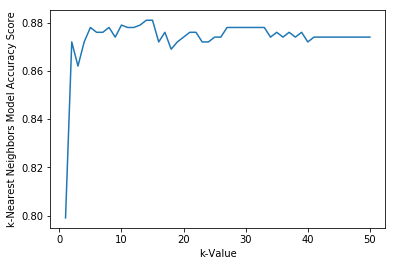

In [12]:
plt.plot(k_range, acc_scores1)
plt.xlabel('k-Value')
plt.ylabel('k-Nearest Neighbors Model Accuracy Score')

** Generate dataframe of k-values and their respective accuracy scores, and determine which k-value has the highest accuracy score. **

In [13]:
knn_acc_scores1 = pd.DataFrame({'k-Value':k_range, 'AccuracyScore':acc_scores1}).set_index('k-Value').sort_index(ascending=True)
knn_acc_scores1.iloc[7, :]

AccuracyScore    0.878
Name: 8, dtype: float64

* The optimal k-value of 8 has the highest accuracy score of 0.878.

** Check for consistency in 8 k-nearest neighbor model accuracy score for random state seed numbers from 115 to 130. **

In [14]:
seed_range = range(115, 131)

acc_scores2 = []

for seed in seed_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores2.append(metrics.accuracy_score(y_test, y_pred).round(3))

** Plot 8 k-nearest neighbor model accuracy scores against random state seed numbers. **

Text(0,0.5,'Eight k-Nearest Neighbors Model Accuracy Score')

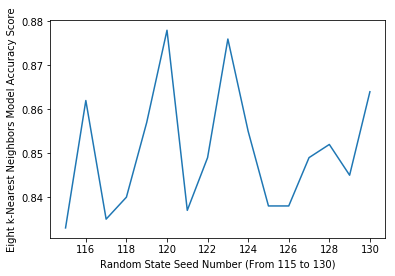

In [15]:
plt.plot(seed_range, acc_scores2)
plt.xlabel('Random State Seed Number (From 115 to 130)')
plt.ylabel('Eight k-Nearest Neighbors Model Accuracy Score')

* 120 is the random state seed number that will produce the highest accuracy score and best k-nearest neighbors model.